In [2]:
#任务1.1
import pandas as pd#导入pandas库
data1=pd.read_excel('cumcm2018c1.xlsx')#读取商场会员信息表
data2=pd.read_csv('cumcm2018c2.csv')#读取商场的销售流水表
print(data1.head())
print(data2.head())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         kh       csrq   xb                    djsj
0  c68b20b4 2002-11-02  0.0 2013-05-11 00:00:00.000
1  1ca15332        NaT  0.0 2004-11-04 16:31:52.436
2  a37cc182 1967-02-17  0.0 2004-12-31 21:24:34.216
3  2ab88539 1982-06-01  0.0 2010-11-19 00:00:00.000
4  b4c77269 1964-02-05  0.0 2007-12-14 00:00:00.000
         kh                    dtime      spbm  sl     sj      je      spmc  \
0  1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1  290.0  270.20  兰芝化妆品正价瓶   
1  1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1  325.0  302.80  兰芝化妆品正价瓶   
2  1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1  195.0  181.80  兰芝化妆品正价瓶   
3  1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1  270.0  251.55  兰芝化妆品正价瓶   
4  1be1e3fe  2015-01-01 00:05:41.593  f09c9303   2  245.0  456.55  兰芝化妆品正价瓶   

       jf  syjh   djh    gzbm gzmc  
0  270.20     6  25bb  8077.0  兰芝柜  
1  302.80     6  25bb  8077.0  兰芝柜  
2  181.80     6  25bb  8077.0  兰芝柜  
3  251.55     6  25bb  8077.0  兰芝柜  
4  456.55     6  25bb  8077.

In [3]:
#查看会员信息表数据的属性
print('会员信息表形状:',data1.shape)
print('每列数据非空值的个数与类型：\n',data1.info())
print('描述统计信息：\n',data1.describe())
print('每列数据的空值个数：\n',data1.isnull().sum())

会员信息表形状: (194740, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194740 entries, 0 to 194739
Data columns (total 4 columns):
kh      194740 non-null object
csrq    160552 non-null datetime64[ns]
xb      185305 non-null float64
djsj    182059 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 5.9+ MB
每列数据非空值的个数与类型：
 None
描述统计信息：
                   xb
count  185305.000000
mean        0.192553
std         0.394306
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
每列数据的空值个数：
 kh          0
csrq    34188
xb       9435
djsj    12681
dtype: int64


In [4]:
#查看商场销售流水表数据的属性
print('销售流水表形状:',data2.shape)
print('销售流水表每列数据非空值的个数与类型：\n',data2.info())
print('销售流水表描述统计信息：\n',data2.describe())
print('销售流水表每列数据的空值个数：\n',data2.isnull().sum())

销售流水表形状: (1893532, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893532 entries, 0 to 1893531
Data columns (total 12 columns):
kh       object
dtime    object
spbm     object
sl       int64
sj       float64
je       float64
spmc     object
jf       float64
syjh     int64
djh      object
gzbm     float64
gzmc     object
dtypes: float64(4), int64(2), object(6)
memory usage: 173.4+ MB
销售流水表每列数据非空值的个数与类型：
 None
销售流水表描述统计信息：
                  sl            sj            je             jf          syjh  \
count  1.893532e+06  1.893532e+06  1.893532e+06  876046.000000  1.893532e+06   
mean   1.060906e+00  1.093785e+03  1.047361e+03    1035.463948  1.002693e+02   
std    2.483580e+00  2.582808e+03  2.697462e+03    2064.978604  6.689405e+01   
min   -3.810000e+02  1.000000e-01 -6.712575e+05 -201616.000000  1.000000e+00   
25%    1.000000e+00  3.200000e+02  3.100000e+02     180.000000  8.700000e+01   
50%    1.000000e+00  5.700000e+02  5.640000e+02     510.000000  9.400000e+01   
75%   

In [5]:
#对商场会员信息数据预处理
#重复值处理
dat1=data1.drop_duplicates()
print(dat1)
#异常值处理
yc=dat1.djsj.dt.year
print(yc)
a=yc[yc>2018]#找出在2018年12月31日之后入会的会员（9280行与151323行）
print(a)
b=dat1.drop([9280,151323],inplace=True)
dat1

              kh       csrq   xb                    djsj
0       c68b20b4 2002-11-02  0.0 2013-05-11 00:00:00.000
1       1ca15332        NaT  0.0 2004-11-04 16:31:52.436
2       a37cc182 1967-02-17  0.0 2004-12-31 21:24:34.216
3       2ab88539 1982-06-01  0.0 2010-11-19 00:00:00.000
4       b4c77269 1964-02-05  0.0 2007-12-14 00:00:00.000
5       83a91070 1968-06-18  1.0 2004-05-01 16:50:13.950
6       34c2dc93 1986-07-18  0.0 2007-04-19 00:00:00.000
7       a2e649aa 1960-07-13  0.0 2007-12-01 00:00:00.000
8       54c044af 1982-06-22  0.0 2005-09-10 13:36:45.146
9       828aa9b4 1951-12-29  0.0 2004-09-24 16:39:08.716
10      2bde7c95 1978-04-16  0.0 2008-11-06 00:00:00.000
11      c36434f0 1960-07-04  0.0 2005-07-22 10:04:44.100
12      f5edfeb3 1976-08-25  1.0 2012-12-31 00:00:00.000
13      5458c567 1983-12-20  1.0 2009-07-14 00:00:00.000
14      946fb355 1988-04-19  1.0 2008-11-06 00:00:00.000
15      f1d94624 1968-09-08  0.0 2008-11-06 00:00:00.000
16      18368515 1963-08-03  1.

kh       csrq   xb                    djsj
0       c68b20b4 2002-11-02  0.0 2013-05-11 00:00:00.000
1       1ca15332        NaT  0.0 2004-11-04 16:31:52.436
2       a37cc182 1967-02-17  0.0 2004-12-31 21:24:34.216
3       2ab88539 1982-06-01  0.0 2010-11-19 00:00:00.000
4       b4c77269 1964-02-05  0.0 2007-12-14 00:00:00.000
5       83a91070 1968-06-18  1.0 2004-05-01 16:50:13.950
6       34c2dc93 1986-07-18  0.0 2007-04-19 00:00:00.000
7       a2e649aa 1960-07-13  0.0 2007-12-01 00:00:00.000
8       54c044af 1982-06-22  0.0 2005-09-10 13:36:45.146
9       828aa9b4 1951-12-29  0.0 2004-09-24 16:39:08.716
10      2bde7c95 1978-04-16  0.0 2008-11-06 00:00:00.000
11      c36434f0 1960-07-04  0.0 2005-07-22 10:04:44.100
12      f5edfeb3 1976-08-25  1.0 2012-12-31 00:00:00.000
13      5458c567 1983-12-20  1.0 2009-07-14 00:00:00.000
14      946fb355 1988-04-19  1.0 2008-11-06 00:00:00.000
15      f1d94624 1968-09-08  0.0 2008-11-06 00:00:00.000
16      18368515 1963-08-03  1.0 2007-09-27 00:00:00.000
17      c39834f5 1953-05-09  0.0 2008-11-06 00:00:00.000
18      6fed2d65 1979-07-14  1.0 2009-05-20 00:00:00.000
19      58b5a603 1968-04-29  0.0                     NaT
20      fc1c83b8 1979-05-07  0.0 2008-11-07 00:00:00.000
21      1a1acadd 1977-11-24  0.0 2005-01-01 16:18:07.000
22      8c88fc25 1973-02-16  0.0                     NaT
23      17cdebe1 1963-09-20  0.0 2008-08-02 00:00:00.000
24      cec309bd 1950-08-24  0.0 2005-07-16 18:05:59.843
25      3291fca8 1964-09-29  0.0 2008-11-07 00:00:00.000
26      89db7af6 1964-12-22  0.0 2005-05-05 16:10:50.433
27      18b3d3a9 1977-10-03  0.0 2016-02-04 00:00:00.000
28      c0311ea3 1981-06-29  0.0 2008-09-07 00:00:00.000
29      a16965a6 1978-08-24  0.0 2008-11-07 00:00:00.000
...          ...        ...  ...                     ...
194710  74626134 1974-11-29  1.0 2013-08-30 00:00:00.000
194711  36aa83d2        NaT  NaN 2011-05-17 00:00:00.000
194712  0b068d43 1974-07-21  1.0 2011-01-13 00:00:00.000
194713  e7b0b941        NaT  NaN                     NaT
194714  9089d732        NaT  NaN                     NaT
194715  f06e3b00        NaT  NaN 2011-02-20 00:00:00.000
194716  5fb9b881 1977-06-04  0.0 2013-08-30 00:00:00.000
194717  391e6d33 1982-09-30  1.0 2013-08-30 00:00:00.000
194718  a3c5f78c 1975-06-26  1.0 2013-08-30 00:00:00.000
194719  36d1e516        NaT  1.0 2013-08-30 00:00:00.000
194720  a25721f1 1981-04-09  NaN 2013-08-30 00:00:00.000
194721  ddbf53e9 1977-09-05  1.0 2013-08-30 00:00:00.000
194722  6432e8ff 1985-08-06  1.0 2010-06-20 00:00:00.000
194723  797834a5        NaT  NaN 2011-10-14 00:00:00.000
194724  6c4fe4e0 1972-09-11  0.0 2013-08-30 00:00:00.000
194725  a2a83979 1986-08-12  1.0 2013-08-30 00:00:00.000
194726  705ea745        NaT  NaN 2010-07-20 00:00:00.000
194727  ed3ce436 1988-11-16  1.0 2013-08-30 00:00:00.000
194728  841edcfb 1984-07-27  0.0 2013-08-30 00:00:00.000
194729  9e7c711e 1993-06-24  1.0 2013-08-30 00:00:00.000
194730  801f72f3 1965-05-11  0.0                     NaT
194731  5b7c99c6 1979-04-23  1.0 2010-06-14 00:00:00.000
194732  3f98ac2e 1981-03-02  1.0 2013-08-30 00:00:00.000
194733  7e24a4fd        NaT  NaN 2013-10-26 00:00:00.000
194734  716746bc        NaT  NaN 2013-10-29 00:00:00.000
194735  a97474e0        NaT  NaN                     NaT
194736  4e14ad22        NaT  0.0 2013-08-30 00:00:00.000
194737  f20299a8        NaT  NaN 2014-03-18 00:00:00.000
194738  a3a27f12 1973-01-10  0.0 2015-03-10 00:00:00.000
194739  a03cc001 1964-08-11  0.0 2010-08-09 00:00:00.000

[194738 rows x 4 columns]

In [6]:
#对商场销售流水表进行预处理
#将非会员的销售纪录提取出来
nkh=data2[data2['kh'].isnull().values==True]
nkh

kh                    dtime      spbm  sl       sj       je  \
243955   NaN  2016-01-01 10:46:09.750  e2c7df40   2    210.0    420.0   
243956   NaN  2016-01-01 10:46:09.750  e2c7df40   2    210.0    420.0   
243957   NaN  2016-01-01 10:46:09.750  e2c7df40   2    210.0    420.0   
243958   NaN  2016-01-01 10:48:49.406  6e479326   1    480.0    480.0   
243959   NaN  2016-01-01 10:48:49.406  6e479326   1    480.0    480.0   
243960   NaN  2016-01-01 10:48:49.406  e7359c76   1    630.0    630.0   
243961   NaN  2016-01-01 10:48:49.406  e7359c76   1    630.0    630.0   
243962   NaN  2016-01-01 10:55:06.876  439ebbb4   1    379.0    379.0   
243963   NaN  2016-01-01 11:00:49.983  f46f6983   1    680.0    666.4   
243964   NaN  2016-01-01 11:00:49.983  37930f06   1    750.0    735.0   
243965   NaN  2016-01-01 11:00:49.983  f46f6983   1    680.0    666.4   
243966   NaN  2016-01-01 11:00:49.983  3993f69b   1   1080.0   1058.4   
243967   NaN  2016-01-01 11:00:49.983  3993f69b   1   1080.0   1058.4   
243968   NaN  2016-01-01 11:00:49.983  3993f69b   1   1080.0   1058.4   
243969   NaN  2016-01-01 11:00:49.983  ae80a799   1   1180.0   1156.4   
243970   NaN  2016-01-01 11:00:49.983  ae80a799   1   1180.0   1156.4   
243971   NaN  2016-01-01 11:00:49.983  ae80a799   1   1180.0   1156.4   
243972   NaN  2016-01-01 11:00:49.983  ae80a799   1   1180.0   1156.4   
243973   NaN  2016-01-01 11:00:49.983  19ba40c3   1    820.0    803.6   
243974   NaN  2016-01-01 11:00:49.983  19ba40c3   1    820.0    803.6   
243975   NaN  2016-01-01 11:00:49.983  37930f06   1    750.0    735.0   
243976   NaN  2016-01-01 11:00:49.983  37930f06   1    750.0    735.0   
243977   NaN  2016-01-01 11:03:22.233  40fec22c   1  12288.0  12042.2   
243978   NaN  2016-01-01 11:05:07.983  f4371490   1    900.0    900.0   
243979   NaN  2016-01-01 11:05:07.983  f4371490   1    900.0    900.0   
243980   NaN  2016-01-01 11:11:50.250  3f5bc9af   1    370.0    370.0   
243981   NaN  2016-01-01 11:11:50.250  bd3ea343   1    245.0    245.0   
243982   NaN  2016-01-01 11:20:28.876  da622ab0   1    599.0    599.0   
243983   NaN  2016-01-01 11:22:37.360  e7359c76   1    630.0    630.0   
243984   NaN  2016-01-01 11:22:37.360  e7359c76   1    630.0    630.0   
...      ...                      ...       ...  ..      ...      ...   
1781711  NaN  2017-09-23 19:58:17.656  3920c655   1    550.0    495.0   
1781712  NaN  2017-09-23 19:58:17.656  7b961f3b   1    590.0    531.0   
1781715  NaN  2017-09-23 19:58:35.783  61dbce63   1    750.0    675.0   
1781716  NaN  2017-09-23 19:58:35.783  61dbce63   1    750.0    675.0   
1781717  NaN  2017-09-23 19:58:35.783  ab4ee5ec   1   2550.0   2295.0   
1781727  NaN  2017-09-23 19:59:50.783  d20f57a8   1    240.0    216.0   
1781731  NaN  2017-09-23 20:00:11.656  30768d8b   1    320.0    320.0   
1781736  NaN  2017-09-23 20:00:49.783  8e64208c   1    460.0    414.0   
1781758  NaN  2017-09-23 20:01:46.686  4661c3ea   1   1300.0   1170.0   
1781759  NaN  2017-09-23 20:01:46.686  f2fdacbc   1    900.0    810.0   
1781761  NaN  2017-09-23 20:01:46.686  b731d643   1   3400.0   3060.0   
1781763  NaN  2017-09-23 20:01:46.686  97a7ce87   1   3200.0   2880.0   
1781767  NaN  2017-09-23 20:01:46.686  a6f1d202   1    990.0    891.0   
1781770  NaN  2017-09-23 20:01:56.783  b1f3e94e   1   4200.0   3780.0   
1781772  NaN  2017-09-23 20:01:56.783  9d2ca4bb   1   2600.0   2340.0   
1781778  NaN  2017-09-23 20:03:01.796  54f11d57   1    480.0    432.0   
1781780  NaN  2017-09-23 20:03:18.736  bce9ea6b   1    530.0    477.0   
1781783  NaN  2017-09-23 20:03:18.736  d55deeb5   2    320.0    576.0   
1781784  NaN  2017-09-23 20:03:18.736  d55deeb5   2    320.0    576.0   
1781785  NaN  2017-09-23 20:03:57.843  04fd33e2   1     38.0     38.0   
1781786  NaN  2017-09-23 20:03:57.843  04fd33e2   1     48.0     48.0   
1781790  NaN  2017-09-23 20:04:37.890  06190abb   1   3083.0   2774.7   
1781792  NaN  2017-09-23 20:05:13.783  8be6ab38   1    830.0    747.

In [8]:
khb=data2[data2['kh'].isnull().values==False]
khb

kh                    dtime      spbm  sl       sj        je  \
0        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    290.0    270.20   
1        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    325.0    302.80   
2        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    195.0    181.80   
3        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    270.0    251.55   
4        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   2    245.0    456.55   
5        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    230.0    214.30   
6        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    310.0    288.85   
7        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   9    358.0   3002.15   
8        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    235.0    218.95   
9        1be1e3fe  2015-01-01 00:05:41.593  f09c9303   1    330.0    307.50   
10       d8d36575  2015-01-01 00:06:38.313  d313ab1e   1   1760.0   1760.00   
11       d8d36575  2015-01-01 00:06:38.313  d313ab1e   1   9072.0   9072.00   
12       d8d36575  2015-01-01 00:06:38.313  50a2c4f5   1   1507.0   1507.00   
13       d8d36575  2015-01-01 00:06:38.313  50a2c4f5   1    899.0    899.00   
14       d8d36575  2015-01-01 00:06:38.313  d313ab1e   1   1960.0   1960.00   
15       ff3b60ec  2015-01-01 00:07:37.593  dfbb18e7   1    350.0    150.00   
16       c853b818  2015-01-01 00:07:51.000  8fa217bd   1   2639.0   2439.00   
17       d67aada7  2015-01-01 00:08:29.593  76e7fa61   1    300.0    300.00   
18       29746369  2015-01-01 00:08:58.986  5f06b14f   1   3160.0   3160.00   
19       29746369  2015-01-01 00:08:58.986  25e03aae   1   4410.0   4410.00   
20       8527d4d0  2015-01-01 00:09:24.593  30768d8b   1    310.0    210.00   
21       b6dac280  2015-01-01 00:10:50.986  2898668c   1   3314.0   3314.00   
22       1be1e3fe  2015-01-01 00:11:45.593  f09c9303   1    235.0    235.00   
23       1be1e3fe  2015-01-01 00:11:45.593  f09c9303   1    560.0    560.00   
24       1be1e3fe  2015-01-01 00:11:45.593  f09c9303   2    245.0    490.00   
25       586a3339  2015-01-01 00:12:13.516  5909b149   1   2436.0   2436.00   
26       c2477497  2015-01-01 00:12:55.000  0611f958   1   1888.0   1888.00   
27       29746369  2015-01-01 00:29:48.593  5f06b14f   1   3300.0   3300.00   
28       29746369  2015-01-01 00:29:48.593  5f06b14f   1   2575.0   2575.00   
29       29746369  2015-01-01 00:29:48.593  5f06b14f   1   2720.0   2720.00   
...           ...                      ...       ...  ..      ...       ...   
1893502  c16722ca  2018-01-03 20:59:26.860  85a974b1   1  23000.0  23000.00   
1893503  d1617127  2018-01-03 21:00:19.470  4cf083f0   1   1151.0   1151.00   
1893504  e2dc3da3  2018-01-03 21:02:26.783  b264e578   1    627.0    627.00   
1893505  e2dc3da3  2018-01-03 21:02:26.783  b264e578   1    657.0    657.00   
1893506  e2dc3da3  2018-01-03 21:02:26.783  b264e578   1    477.0    477.00   
1893507  e2dc3da3  2018-01-03 21:02:26.783  b264e578   1    237.0    237.00   
1893508  e2dc3da3  2018-01-03 21:02:26.783  b264e578   1    837.0    837.00   
1893509  fa6410d0  2018-01-03 21:02:35.343  1fd2746e   1    680.0    680.00   
1893510  794d9da7  2018-01-03 21:06:02.283  c4edc929   1  10800.0  10800.00   
1893511  e2dc3da3  2018-01-03 21:06:02.783  b264e578   1    777.0    777.00   
1893512  69de49e9  2018-01-03 21:08:58.063  88111139   1    560.0    560.00   
1893513  69de49e9  2018-01-03 21:08:58.063  4e727693   1    640.0    640.00   
1893514  69de49e9  2018-01-03 21:08:58.063  1c680610   1    550.0    550.00   
1893515  2ab611cf  2018-01-03 21:09:00.656  6feea3f5   1    940.0    940.00   
1893516  2ab611cf  2018-01-03 21:09:00.656  6feea3f5   1   1230.0   1230.00   
1893517  6b625403  2018-01-03 21:16:21.610  7b2c786a   1   2990.0   2990.00   
1893518  08620f11  2018-01-03 21:18:55.686  3993f69b   1   1080.0   1080.00   
1893519  08620f11  2018-01-03 21:18:55.686  67d6c52a   1    760.0    760.00   
1893520  08620f11  2018-01-03 21:18:55.686  a4fa60ae   1    270.0

In [9]:
#任务1.2
#将处理后的会员信息表与销售流水表合并
hb=pd.merge(dat1,khb,how='outer',left_on='kh',right_on='kh')
hb
task1=hb.to_csv('task1.csv')

In [19]:
#任务2.1
#将会员按年龄划分为老年，中年，青年并绘制年龄占比图
dat3=pd.read_csv('task1.csv')
dat3['csrq']=pd.to_datetime(dat1.csrq)
dat3.csrq
dat3['nl']=2018-dat3.csrq.dt.year
nl=2018-dat3.csrq.dt.year
nl

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0          16.0
1           NaN
2          51.0
3          36.0
4          54.0
5          50.0
6          32.0
7          58.0
8          36.0
9          67.0
10         40.0
11         58.0
12         42.0
13         35.0
14         30.0
15         50.0
16         55.0
17         65.0
18         39.0
19         50.0
20         39.0
21         41.0
22         45.0
23         55.0
24         68.0
25         54.0
26         54.0
27         41.0
28         37.0
29         40.0
           ... 
1023485     NaN
1023486     NaN
1023487     NaN
1023488     NaN
1023489     NaN
1023490     NaN
1023491     NaN
1023492     NaN
1023493     NaN
1023494     NaN
1023495     NaN
1023496     NaN
1023497     NaN
1023498     NaN
1023499     NaN
1023500     NaN
1023501     NaN
1023502     NaN
1023503     NaN
1023504     NaN
1023505     NaN
1023506     NaN
1023507     NaN
1023508     NaN
1023509     NaN
1023510     NaN
1023511     NaN
1023512     NaN
1023513     NaN
1023514     NaN
Name: csrq, Length: 1023

In [20]:
bins=[min(nl),18,60,max(nl)]
labels=['青年','中年','老年']
dat3['fz1']=pd.cut(nl,bins,labels=labels)
g=dat3['fz1'].value_counts()
h=g/sum(g)
print(h)

中年    0.852860
老年    0.143951
青年    0.003189
Name: fz1, dtype: float64


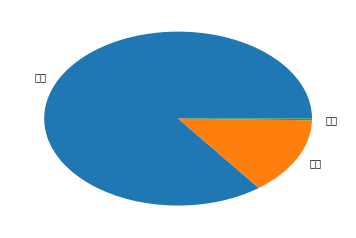

In [22]:
import matplotlib.pyplot as plt
plt.pie(h,labels=['中年','老年','青年'])
plt.show()

In [27]:
#统计不同年龄的消费金额
dat3
ycsrq=dat3[dat3['csrq'].isnull().values==False]
import numpy as np
btnlxf=ycsrq.groupby(by=['nl'])['je'].sum()
btnlxf

nl
0.0             0.00
1.0        262845.18
2.0          1087.57
3.0         32551.66
4.0         20969.96
5.0          6200.00
6.0          4083.59
7.0          2266.00
8.0          6546.00
9.0          1258.80
10.0         3191.53
11.0         5093.00
12.0         5182.65
13.0         3179.00
14.0         3820.00
15.0        30278.97
16.0        13806.54
17.0        19262.31
18.0        41814.06
19.0        99237.25
20.0       153650.05
21.0       208499.09
22.0       331850.06
23.0       527380.93
24.0       719577.15
25.0      1015655.13
26.0      1433575.08
27.0      1967153.12
28.0      2482051.81
29.0      3601200.82
            ...     
99.0          990.00
100.0           0.00
101.0         295.00
103.0        2835.00
104.0        3688.00
107.0         423.00
109.0           0.00
110.0         880.00
111.0         300.00
118.0       18591.28
120.0           0.00
122.0           0.00
123.0           0.00
128.0           0.00
130.0         432.83
132.0          79.00
134.0     

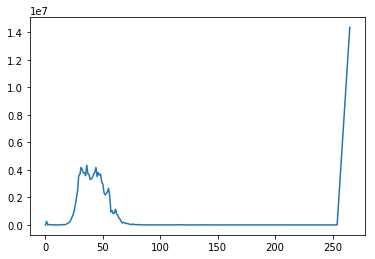

In [32]:
import matplotlib.pyplot as plt
plt.plot(btnlxf)
plt.show()

In [49]:
#统计会员性别人数比例和不同性别消费金额比例
import numpy as np
dat4=pd.read_csv('task1.csv')
xb=dat4['xb'].value_counts()
xbbl=xb/sum(xb)
xbbl

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


0.0    0.874308
1.0    0.125692
Name: xb, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


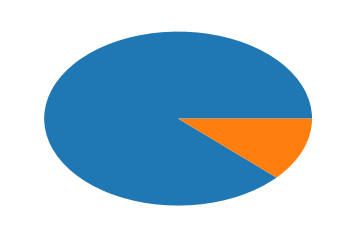

In [54]:
import matplotlib.pyplot as plt
khxf=dat4.groupby(by=['xb'])['je'].agg({'消费总金额':np.sum})
khxf
plt.pie(khxf)
plt.show()